In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
from datetime import datetime

In [7]:
# Import requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bef11af0409ff27987e3615bc3c2fdc6


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log URL,  record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),"Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity,
                          "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | razole
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | tagusao
Processing Record 9 of Set 1 | oyama
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | loandjili
Processing Record 12 of Set 1 | westport
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | bafq
Processing Record 17 of Set 1 | dwarka
Processing Record 18 of Set 1 | bay roberts
Processing Record 19 of Set 1 | nalut
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | 

Processing Record 38 of Set 4 | lavrentiya
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | rungata
City not found. Skipping...
Processing Record 41 of Set 4 | springfield
Processing Record 42 of Set 4 | ovalle
Processing Record 43 of Set 4 | brae
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | estelle
Processing Record 50 of Set 4 | labuhan
Processing Record 1 of Set 5 | paamiut
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | pishva
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | roald
Processing Record 7 of Set 5 | mrirt
City not found. Skipping...
Processing Record 8 of Set 5 | mapiripan
Processing Record 9 of Set 5 | tsihom

Processing Record 26 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 27 of Set 8 | nabire
Processing Record 28 of Set 8 | shinjo
Processing Record 29 of Set 8 | san diego
Processing Record 30 of Set 8 | matameye
City not found. Skipping...
Processing Record 31 of Set 8 | virtsu
Processing Record 32 of Set 8 | carrickfergus
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | mantua
Processing Record 36 of Set 8 | corinto
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | hurricane
Processing Record 41 of Set 8 | old shinyanga
Processing Record 42 of Set 8 | marsh harbour
Processing Record 43 of Set 8 | revda
Processing Record 44 of Set 8 | ambatondrazaka
Processing Record 45 of Set 8 | vardo
Processing Record 46 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 47 of Set 8 | kaeo
Processing Record 4

Processing Record 8 of Set 12 | namibe
Processing Record 9 of Set 12 | treinta y tres
Processing Record 10 of Set 12 | grafton
Processing Record 11 of Set 12 | west odessa
Processing Record 12 of Set 12 | crepy-en-valois
Processing Record 13 of Set 12 | meadow lake
Processing Record 14 of Set 12 | loa janan
Processing Record 15 of Set 12 | srivardhan
Processing Record 16 of Set 12 | tacna
Processing Record 17 of Set 12 | lixourion
Processing Record 18 of Set 12 | xuddur
Processing Record 19 of Set 12 | mossendjo
Processing Record 20 of Set 12 | rincon
Processing Record 21 of Set 12 | tobermory
Processing Record 22 of Set 12 | porto walter
Processing Record 23 of Set 12 | merauke
Processing Record 24 of Set 12 | kaura namoda
Processing Record 25 of Set 12 | khonuu
City not found. Skipping...
Processing Record 26 of Set 12 | kindu
Processing Record 27 of Set 12 | gazanjyk
Processing Record 28 of Set 12 | tunduru
City not found. Skipping...
Processing Record 29 of Set 12 | talnakh
Process

In [10]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.05,166.44,13.03,83,65,0.51,RU,2020-04-14 23:42:40
1,Mataura,-46.19,168.86,46.00,95,100,5.01,NZ,2020-04-14 23:42:40
2,Avera,33.19,-82.53,80.60,54,75,3.36,US,2020-04-14 23:42:41
3,Longyearbyen,78.22,15.64,30.20,74,75,27.51,SJ,2020-04-14 23:42:41
4,Cheney,47.49,-117.58,57.99,32,90,19.46,US,2020-04-14 23:42:19
5,Busselton,-33.65,115.33,60.01,68,46,15.93,AU,2020-04-14 23:42:41
6,Labrea,-7.26,-64.80,75.72,93,74,1.41,BR,2020-04-14 23:42:41
7,Butaritari,3.07,172.79,83.66,80,66,17.02,KI,2020-04-14 23:42:42
8,Arona,28.10,-16.68,66.99,72,20,3.36,ES,2020-04-14 23:42:42
9,Uglekamensk,43.22,133.23,49.42,42,11,7.38,RU,2020-04-14 23:42:42


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilibino,RU,2020-04-14 23:42:40,68.05,166.44,13.03,83,65,0.51
1,Mataura,NZ,2020-04-14 23:42:40,-46.19,168.86,46.00,95,100,5.01
2,Avera,US,2020-04-14 23:42:41,33.19,-82.53,80.60,54,75,3.36
3,Longyearbyen,SJ,2020-04-14 23:42:41,78.22,15.64,30.20,74,75,27.51
4,Cheney,US,2020-04-14 23:42:19,47.49,-117.58,57.99,32,90,19.46
5,Busselton,AU,2020-04-14 23:42:41,-33.65,115.33,60.01,68,46,15.93
6,Labrea,BR,2020-04-14 23:42:41,-7.26,-64.80,75.72,93,74,1.41
7,Butaritari,KI,2020-04-14 23:42:42,3.07,172.79,83.66,80,66,17.02
8,Arona,ES,2020-04-14 23:42:42,28.10,-16.68,66.99,72,20,3.36
9,Uglekamensk,RU,2020-04-14 23:42:42,43.22,133.23,49.42,42,11,7.38


In [12]:
# Create the outputfile (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

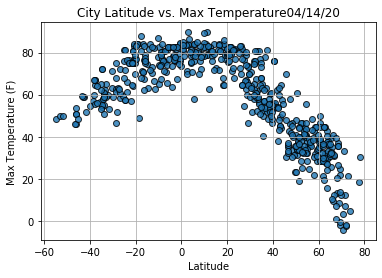

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

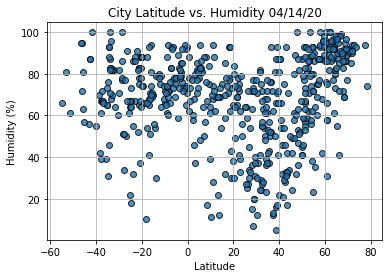

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

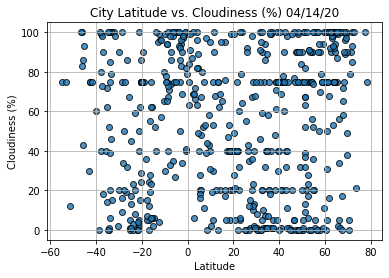

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

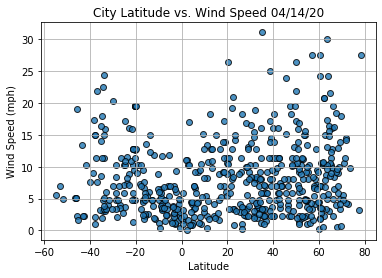

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Applying loc method to city df
index13 = city_data_df.loc[13]
index13

City                       Atuona
Lat                          -9.8
Lng                       -139.03
Max Temp                    82.47
Humidity                       66
Cloudiness                     30
Wind Speed                   4.83
Country                        PF
Date          2020-04-14 23:42:43
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.05,166.44,13.03,83,65,0.51,RU,2020-04-14 23:42:40
2,Avera,33.19,-82.53,80.60,54,75,3.36,US,2020-04-14 23:42:41
3,Longyearbyen,78.22,15.64,30.20,74,75,27.51,SJ,2020-04-14 23:42:41
4,Cheney,47.49,-117.58,57.99,32,90,19.46,US,2020-04-14 23:42:19
7,Butaritari,3.07,172.79,83.66,80,66,17.02,KI,2020-04-14 23:42:42


In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

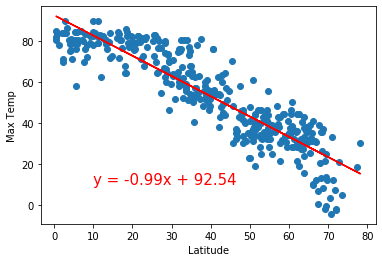

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,10))

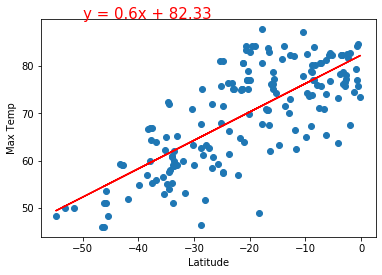

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

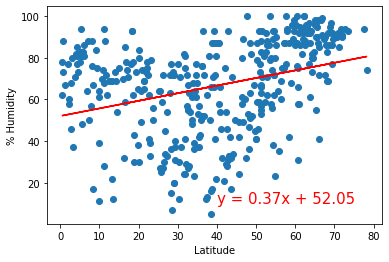

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

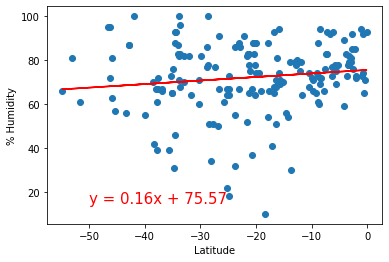

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

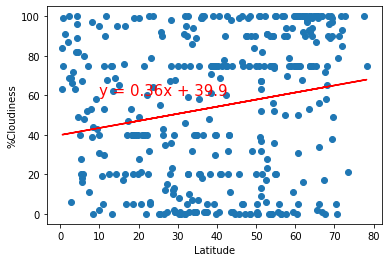

In [28]:
# linear regression on n hrmisphere 5 cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northen Hemisphere \n for % Cloudiness", "%Cloudiness", (10, 60))

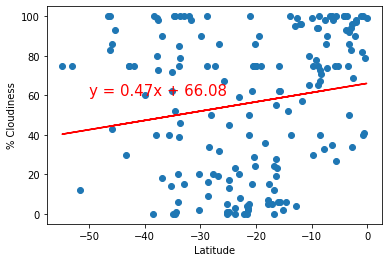

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

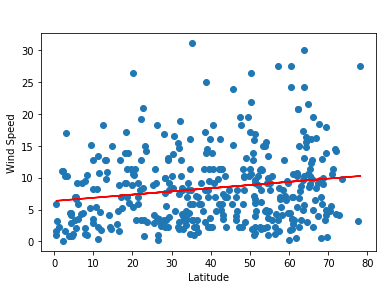

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))